# 🎬 Netflix Titles Data Analysis

This notebook explores trends in the Netflix catalog, including content types, country contributions, genres, and release timelines.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Preprocessing
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['main_genre'] = df['listed_in'].str.split(',').str[0]

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,main_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Docuseries
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,International TV Shows


## 📺 Movies vs TV Shows

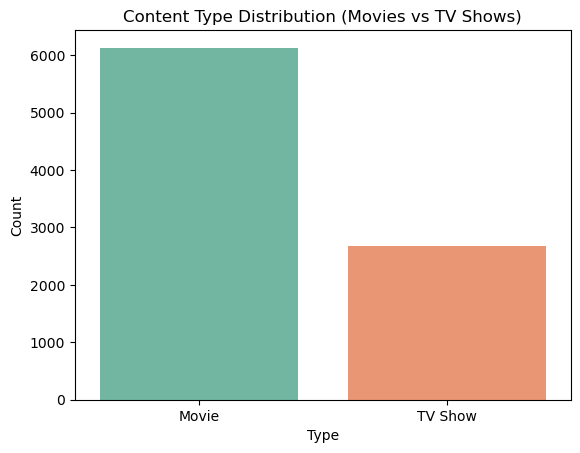

In [5]:
sns.countplot(x='type', hue='type', data=df, palette='Set2', legend=False)
plt.title("Content Type Distribution (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

## 📅 Titles Added Per Year

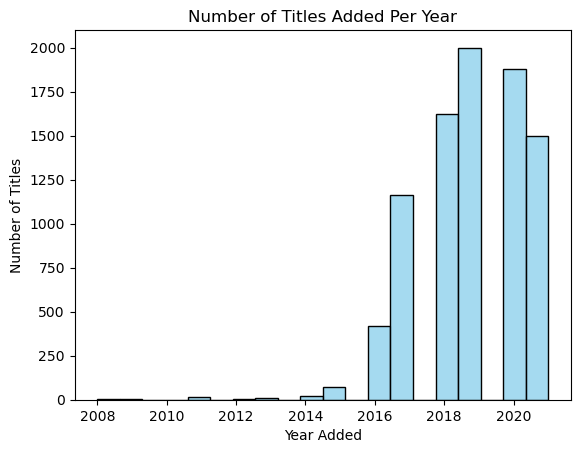

In [8]:
sns.histplot(df['year_added'].dropna(), bins=20, kde=False, color='skyblue')
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

## 🌍 Top Countries Producing Netflix Content

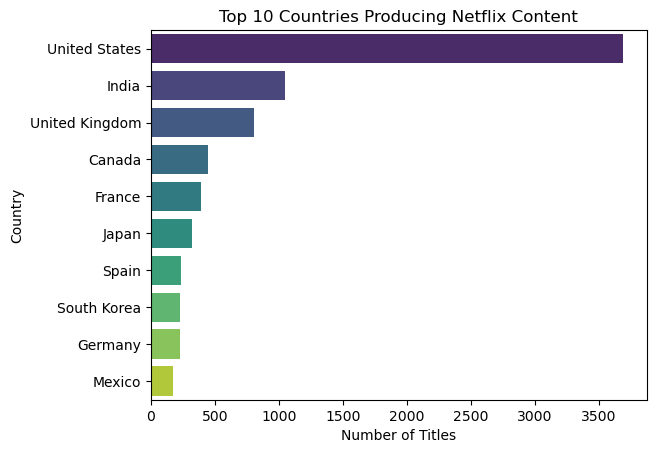

In [16]:
top_countries = df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='viridis', dodge=False, legend=False)
plt.legend([],[], frameon=False)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

## 🎭 Top Genres on Netflix

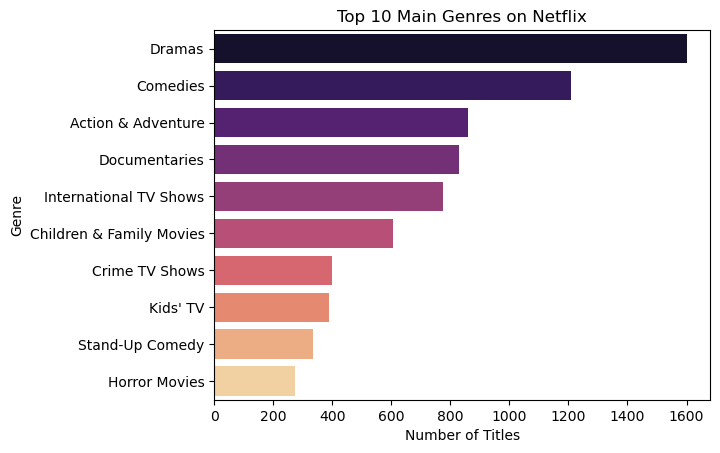

In [18]:
top_genres = df['main_genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='magma', dodge=False, legend=False)
plt.legend([],[], frameon=False)
plt.title("Top 10 Main Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()